## Load packages

In [164]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatLogSlider
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

## Printed working dir 

In [4]:
pwd

'/Users/rvieira/VScode_project/cell_correlation/notebooks'

## Set the file path 

In [5]:
filepath = Path('../data/processed/suite2p/plane0')
filepath.resolve()

PosixPath('/Users/rvieira/VScode_project/cell_correlation/data/processed/suite2p/plane0')

## Loaded various data from Suite2p output

In [6]:
F = np.load(filepath.joinpath('F.npy'), allow_pickle= True)
F.shape

(447, 2250)

In [7]:
Fneu = np.load(filepath.joinpath('Fneu.npy'), allow_pickle= True)
Fneu.shape

(447, 2250)

In [8]:
spks = np.load(filepath.joinpath('spks.npy'), allow_pickle= True)
spks.shape

(447, 2250)

In [9]:
stat = np.load(filepath.joinpath('stat.npy'), allow_pickle= True)
stat.shape

(447,)

In [10]:
iscell = np.load(filepath.joinpath('iscell.npy'), allow_pickle= True)
iscell.shape

(447, 2)

In [11]:
ops = np.load(filepath.joinpath('ops.npy'), allow_pickle= True)
ops=ops.item()
ops.keys()

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'anatomical_only', 'cellprob_threshold', 'flow_threshold', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'ma

## Explore spks 

In [176]:
@interact(index=IntSlider(value=0,min=0,max=spks.shape[0]-1))
def show_spikes(index):
    plt.figure(figsize=(10,5))
    plt.plot(spks[index])

interactive(children=(IntSlider(value=0, description='index', max=446), Output()), _dom_classes=('widget-inter…

## Using sklearn package normalized spks

In [17]:
norm_spikes = preprocessing.minmax_scale(spks)

## Plot of spks normalized 

In [178]:
@interact(index=IntSlider(value=0,min=0,max=norm_spikes.shape[0]-1))
def show_spikes(index):
    plt.figure(figsize=(10,5))
    plt.plot(norm_spikes[index])

interactive(children=(IntSlider(value=0, description='index', max=446), Output()), _dom_classes=('widget-inter…

## Clustering using kmeans 

In [179]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(norm_spikes)
kmeans.labels_

array([2, 2, 5, 1, 2, 2, 2, 2, 2, 8, 7, 0, 4, 2, 9, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 9, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Overview of cell positions 

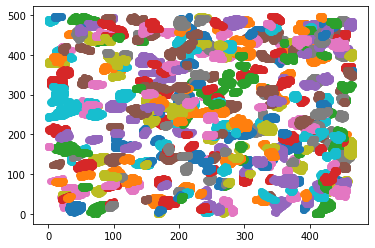

In [182]:
for x in range(0,len(stat)):
    plt.plot(stat[x]["xpix"], stat[x]["ypix"], "o");

## Extracted single x and y coordinates for cells 

In [183]:
xdim = [x["xpix"][0] for x in stat]
len(xdim)

447

In [184]:
ydim = [x["ypix"][0] for x in stat]
len(ydim)

447

## Kmeans cluster plot with sliders 

In [185]:
@interact(clusternumber = IntSlider(value=5, min=1, max=50, continuous_update=False))
def clusterslider(clusternumber):
    kmeans = KMeans(n_clusters=clusternumber, random_state=0).fit(norm_spikes)
    label = kmeans.labels_
    plt.scatter(xdim, ydim, c=label, cmap='coolwarm');

interactive(children=(IntSlider(value=5, continuous_update=False, description='clusternumber', max=50, min=1),…

## Extracted spikes from real cells 

In [135]:
real_spike = spks[np.where(iscell[:,0]==1)]
real_spike.shape

(161, 2250)

## Normalized spikes from real cells

In [136]:
norm_real_spikes = preprocessing.minmax_scale(real_spike)

In [137]:
kmeans_real = KMeans(n_clusters=10, random_state=0).fit(norm_real_spikes)
label_real = kmeans.labels_
label_real[:5]

array([1, 1, 0, 3, 0], dtype=int32)

In [139]:
real_stat = stat[np.where(iscell[:,0] == 1)]
real_stat.shape

(161,)

In [140]:
xdim_real = [x["xpix"][0] for x in real_stat]
len(xdim_real)

161

In [141]:
ydim_real = [x["ypix"][0] for x in real_stat]
len(ydim_real)

161

## Kmeans cluster plot with sliders of real cells

In [144]:
@interact(clusternumber = IntSlider(value=5, min=1, max=50, continuous_update=False))
def clusterslider(clusternumber):
    kmeans = KMeans(n_clusters=clusternumber, random_state=0).fit(norm_real_spikes)
    label_real = kmeans.labels_
    plt.scatter(xdim_real, ydim_real, c=label_real, cmap='coolwarm')
    plt.colorbar();

interactive(children=(IntSlider(value=5, continuous_update=False, description='clusternumber', max=50, min=1),…

## Explored DBSCAN 

In [162]:
@interact(eps=IntSlider(value=3,min=1,max=50),min_samples=IntSlider(value=2,min=1,max=50))
def test_DBSCAN(eps,min_samples):
    DBSCAN_spikes = DBSCAN(eps=eps, min_samples=min_samples).fit(norm_real_spikes)
    DBSCAN_labels = DBSCAN_spikes.labels_
    print(DBSCAN_labels)

interactive(children=(IntSlider(value=3, description='eps', max=50, min=1), IntSlider(value=2, description='mi…

## Explored PCA 

In [172]:
pca = PCA(n_components = 100) 
pca.fit(norm_real_spikes) 
pca.components_ 
pca.explained_variance_ratio_

array([0.04893997, 0.03103   , 0.03051226, 0.02542778, 0.0231693 ,
       0.02178135, 0.02077976, 0.01781002, 0.01687992, 0.01650181,
       0.01535609, 0.01506326, 0.01458079, 0.01401724, 0.01387946,
       0.01284644, 0.01238966, 0.01206418, 0.01196172, 0.01145214,
       0.01105635, 0.01091971, 0.01064654, 0.01038189, 0.01022891,
       0.0098382 , 0.00956604, 0.00943977, 0.00939415, 0.00925051,
       0.00891716, 0.00887403, 0.0087551 , 0.00852196, 0.00829617,
       0.00818979, 0.00808489, 0.00794808, 0.00779848, 0.00766145,
       0.00754355, 0.00741638, 0.00727787, 0.00719748, 0.00717126,
       0.00690484, 0.00685044, 0.0067471 , 0.00669005, 0.00654238,
       0.00645817, 0.0062838 , 0.00611904, 0.00606763, 0.00596411,
       0.0058838 , 0.00577204, 0.00574455, 0.00563209, 0.00550825,
       0.00543319, 0.00535358, 0.0052739 , 0.00522708, 0.00511234,
       0.00508441, 0.00499362, 0.00497766, 0.00489055, 0.00472654,
       0.00469243, 0.00462197, 0.00457689, 0.00451829, 0.00441

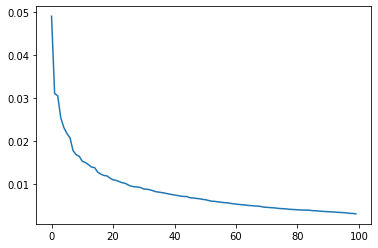

In [173]:
plt.plot(pca.explained_variance_ratio_)